In [ ]:
#Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
#Import datasets (both Arkansas and Alabama)
arkansas = pd.read_csv("ark_stats_edited.csv")

In [ ]:
#See the data
arkansas.head(5)

,GameId,Week,Team,Opponent,Offense Plays,Offense Drives,Offense Ppa,Offense TotalPPA,Offense SuccessRate,Offense Explosiveness,...,Defense PassingDowns SuccessRate,Defense PassingDowns Explosiveness,Defense RushingPlays Ppa,Defense RushingPlays TotalPPA,Defense RushingPlays SuccessRate,Defense RushingPlays Explosiveness,Defense PassingPlays Ppa,Defense PassingPlays TotalPPA,Defense PassingPlays SuccessRate,Defense PassingPlays Explosiveness
0,401520149,1,Alabama,Middle Tennessee,41,8,0.535129,21.940280,0.585366,1.259973,...,0.142857,1.757869,0.413509,4.548595,0.727273,0.799243,0.029846,0.716300,0.250000,1.292497
1,401520183,2,Alabama,Texas,62,12,0.205370,12.732942,0.354839,1.595022,...,0.285714,2.677466,-0.045244,-1.674015,0.351351,1.036885,0.470699,17.886560,0.368421,2.073817
2,401520244,3,Alabama,South Florida,65,12,0.050696,3.295265,0.384615,1.212931,...,0.250000,1.810627,0.090250,3.700233,0.268293,1.679494,-0.377189,-12.070044,0.218750,0.918594
3,401520250,4,Alabama,Ole Miss,64,11,0.141250,9.040023,0.437500,1.118141,...,0.296296,2.547461,0.113546,2.725110,0.250000,1.297593,0.293157,11.139959,0.368421,1.768980
4,401520285,5,Alabama,Mississippi State,52,10,0.297859,15.488651,0.500000,1.258700,...,0.400000,1.852233,0.227619,6.373334,0.357143,1.381140,-0.133238,-3.597414,0.296296,1.557289


In [ ]:
#Dropping columns
arkansas = arkansas.drop(columns = ["GameId", "Week", "Team", "Opponent"])

In [ ]:
corr = arkansas.corr()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr, 20))

Top Absolute Correlations
Defense PassingPlays Ppa           Defense PassingPlays TotalPPA        0.997113
Defense Plays                      Points                               0.992544
Offense Ppa                        Offense StandardDowns Ppa            0.991101
Defense SecondLevelYards           Defense RushingPlays SuccessRate     0.989973
Defense Ppa                        Defense TotalPPA                     0.987564
Offense Ppa                        Offense TotalPPA                     0.984833
Defense OpenFieldYards             Defense StandardDowns Ppa            0.984350
Offense SuccessRate                Offense StandardDowns SuccessRate    0.982776
Offense OpenFieldYards             Offense OpenFieldYardsTotal          0.981921
Defense StandardDowns SuccessRate  Defense RushingPlays SuccessRate     0.980722
Offense TotalPPA                   Offense StandardDowns Ppa            0.978647
Offense SuccessRate                Offense RushingPlays SuccessRate     0.977867
Of

In [ ]:
#For regression, we preproccess the data
X = arkansas[["Defense Plays"]]
y = arkansas[["Points"]]

In [ ]:
#Split the data for training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Apply linear regression
reg = LinearRegression().fit(X, y)

In [ ]:
#Compute training error
mse_train = mse(ytrain, reg.predict(Xtrain))
print(mse_train)

#Compute testing error
mse_test = mse(ytest, reg.predict(Xtest))
print(mse_test)

1.5002711788428462
6.184930807495415


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


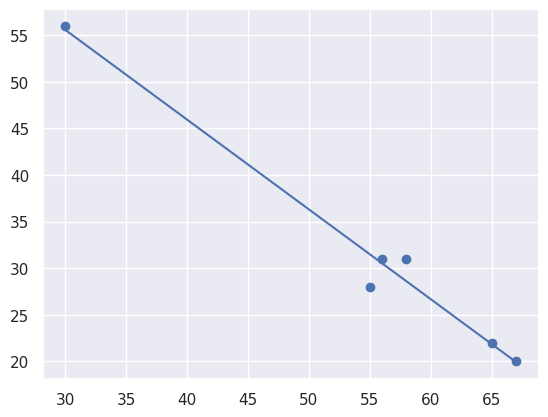

In [ ]:
# Visualize the result
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots()
ax.scatter(arkansas[["Defense Plays"]], y, marker='o')
x_axis = np.linspace(np.min(arkansas[["Defense Plays"]]), np.max(arkansas[["Defense Plays"]]), 500)
y_axis = reg.coef_[0,0] * x_axis + reg.intercept_
ax.plot(x_axis, y_axis)
plt.show()


In [ ]:
data = arkansas[["Offense Plays", "Defense Plays", "Result"]]

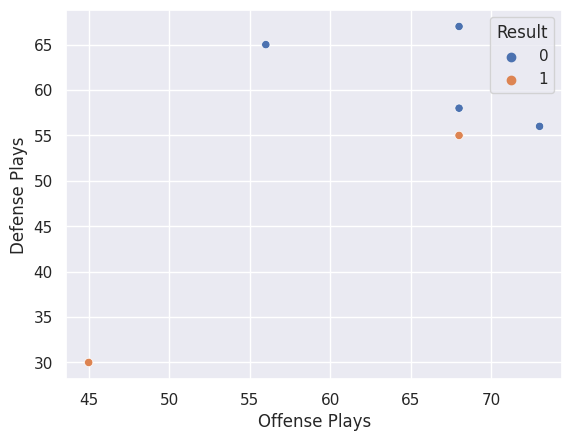

In [ ]:
#Try now with decision trees
from sklearn.tree import DecisionTreeRegressor
fig, ax = plt.subplots()
sns.scatterplot(data=data, x="Offense Plays", y="Defense Plays", hue='Result', ax=ax)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [ ]:
X=data[["Offense Plays", "Defense Plays"]].values # The features
y=data['Result'].values # The labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.5, 0.75, 'Defense Plays <= 55.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = lose'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = win'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = lose')]

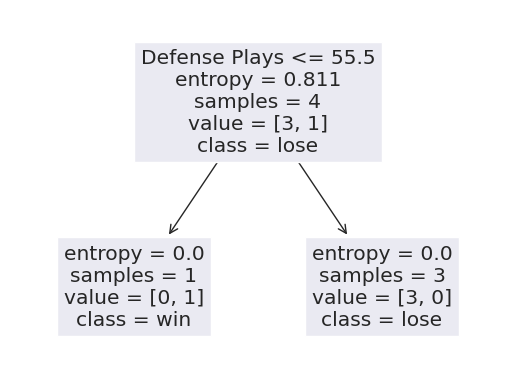

In [ ]:
# plot_tree(tree_clf)
plot_tree(tree_clf, feature_names=["Offense Plays", "Defense Plays"], class_names=['lose', 'win'])

In [ ]:
import itertools
from matplotlib.colors import ListedColormap

# Modified from A. Geron
def plot_decision_boundary(clf, X, y, legend=False, plot_training=True, ax=None, figsize=(10,6)):

    if not ax: f, ax = plt.subplots(figsize=figsize)

    # Convert to numpy arrays in case X and y are data frames
    X, y = np.array(X), np.array(y)

    x1 = X[:,0] # First feature
    x2 = X[:, 1] # Second feature


    x1s = np.linspace(np.min(x1)-0.1*np.mean(x1), 1.1*np.max(x1), 100)
    x2s = np.linspace(np.min(x2)-0.1*np.mean(x2), 1.1*np.max(x2), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    dots = ["yo", "bs", "g^"]

    if plot_training:
        for i in np.unique(y):

            ax.plot(X[:, 0][y==i], X[:, 1][y==i], dots[i], label=str(i))

    else:
        ax.set_xlabel(r"$x_1$", fontsize=18)
        ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.legend(loc="lower right", fontsize=14)
    ax.set_title("Decision boundary")

    return ax

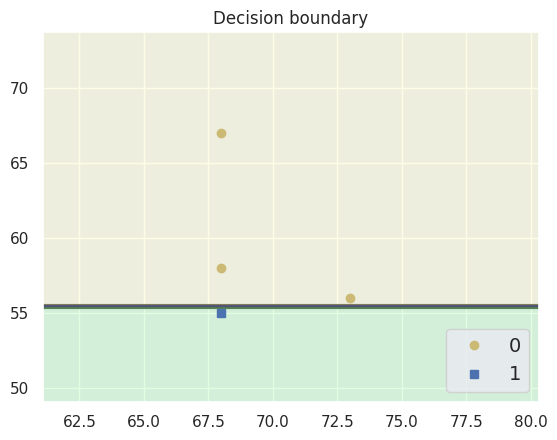

In [ ]:
fig, ax = plt.subplots()
ax = plot_decision_boundary(tree_clf, X_train,y_train, ax=ax)
plt.show()